<a href="https://colab.research.google.com/github/Degananda264/Air-Passengers-predicting-using-LSTM/blob/master/Air_Passengers_predicting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv("/content/AirPassengers.csv")

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
df.shape

(144, 2)

In [15]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

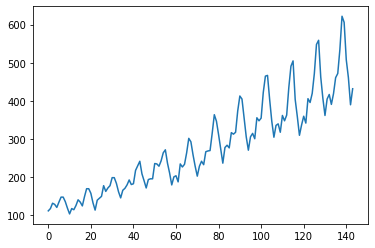

In [6]:
plt.plot(df['#Passengers'])

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_df=scaler.fit_transform(df.iloc[:,1:])

In [13]:
scaled_df.shape

(144, 1)

In [0]:
train_df_size=int(len(df)*0.65)

In [19]:
train_df_size

93

In [0]:
test_df_size=len(df)-train_df_size

In [23]:
test_df_size

51

In [0]:
train_data,test_data=scaled_df[0:train_df_size,:],scaled_df[train_df_size:len(df),:1]

In [28]:
train_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [0]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:

X_train.shape, y_train.shape

((88, 4), (88,))

In [0]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [0]:

### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
88/88 [==============================] - 1s 17ms/step - loss: 0.0165 - val_loss: 0.0265
Epoch 2/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0064 - val_loss: 0.0553
Epoch 3/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0062 - val_loss: 0.0299
Epoch 4/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0057 - val_loss: 0.0267
Epoch 5/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0055 - val_loss: 0.0305
Epoch 6/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0057 - val_loss: 0.0308
Epoch 7/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0053 - val_loss: 0.0282
Epoch 8/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0054 - val_loss: 0.0368
Epoch 9/100
88/88 [==============================] - 1s 6ms/step - loss: 0.0049 - val_loss: 0.0223
Epoch 10/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0060 - val_loss: 0.0224
Epoch 11

In [0]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [0]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
y_train.shape,train_predict.shape,train_predict

((88,), (88, 1), array([[128.09128 ],
        [122.38815 ],
        [135.05687 ],
        [145.18779 ],
        [144.66136 ],
        [135.20808 ],
        [121.97234 ],
        [109.85535 ],
        [120.51669 ],
        [116.50039 ],
        [125.873566],
        [138.77332 ],
        [133.14487 ],
        [126.143166],
        [147.93977 ],
        [164.48143 ],
        [163.04324 ],
        [153.98744 ],
        [133.57405 ],
        [119.15757 ],
        [140.9255  ],
        [141.91487 ],
        [146.83247 ],
        [173.49202 ],
        [155.60655 ],
        [169.08458 ],
        [172.86977 ],
        [192.94196 ],
        [188.81332 ],
        [175.96553 ],
        [158.45667 ],
        [146.49136 ],
        [165.42867 ],
        [165.45427 ],
        [174.36389 ],
        [186.47763 ],
        [172.50662 ],
        [178.77493 ],
        [213.37971 ],
        [216.31172 ],
        [230.16151 ],
        [190.63353 ],
        [186.14267 ],
        [168.0787  ],
        [192.308

In [38]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

209.36198788097215

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

357.4234580617042

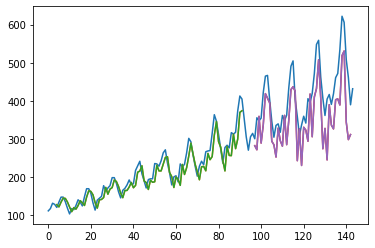

In [42]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(scaled_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()